In [ ]:
from keras.datasets import mnist
from google.colab import drive
drive.mount('/content/drive')
prefix="drive/My Drive/MSc./Ensemble-Learning/Project/models/"

Mounted at /content/drive


In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


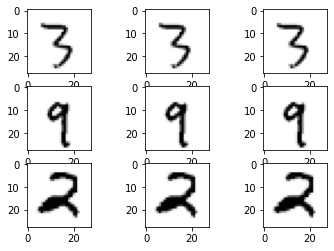

In [ ]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(3, 3)

for i in range(3): 
  for j in range(3):
    axs[i, j].imshow(train_X[i*44*3 + 44],cmap='Greys')

  


In [ ]:
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
import numpy as np

In [ ]:
train_x = train_X.reshape(train_X.shape[0], 28,28,1)
test_x = test_X.reshape(test_X.shape[0], 28,28,1)
train_x= train_x.astype('float32')
test_x= test_x.astype('float32')
train_x /=255.0
test_x /=255.0

input_shape = (28, 28, 1)
train_x.shape

(60000, 28, 28, 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,MaxPool2D
from tensorflow.keras.optimizers import Adam

In [ ]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_train_begin(self, batch, logs=None):
      global logEpochs
      logEpochs.append(self.weights_to_list(self.model.get_weights()))
    def on_epoch_end(self, epoch, logs={}):
      global logEpochs,weights
      logEpochs.append(self.weights_to_list(self.model.get_weights()))
      weights.append(self.model.get_weights())
    def weights_to_list(self,weights):
      l=[]
      for i in range(0,len(weights)):
          l+=weights[i].flatten().tolist()
      return l

def create_model(filters = 64, kernel_size = 7, strides=1, units = 10, 
                 optimizer='adam', rate = 0.2, kernel_initializer="glorot_uniform"):
  model = Sequential()
  model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
  model.add(Dense(128, activation=tf.nn.relu))
  model.add(Dropout(0.2))
  model.add(Dense(10,activation="softmax"))
  model.compile(optimizer="adam",metrics=['accuracy'],loss=tf.keras.losses.SparseCategoricalCrossentropy())
  return model
def initModelWeights(model,c=0.3):
  weights=[]
  for w in model.get_weights():
    weights.append(np.random.normal(c, 0.001, size=w.shape))
  model.set_weights(weights)
#iki nokta arasındaki eğimi bulup bunu istenilen parçaya bölen kısım
def findSlope(w0,w1,bins):
  result=[]
  for i in range(len(w0)):
    w0i=w0[i]
    w1i=w1[i]
    result.append((w1i-w0i)/bins)
  return result
#eğim ve kaçıncı adım olduğu verildiğinde başlangıç noktasından bitiş noktasına belirtilen oranda ilerleten kısım
def nextStep(w0,slope,step):
  result=[]
  for i in range(len(w0)):
    w0i=w0[i]
    slopei=slope[i]
    result.append(w0i+(slopei*step))
  return result
#belli bir başlangıç noktasına göre modeli eğiten kısım
def runModel(startingPoint=0.2):
  global logEpochs, weights
  logEpochs=[]
  weights=[]
  model = create_model()
  initModelWeights(model,startingPoint)
  model.fit(train_x,train_y,epochs=16, batch_size=64,callbacks=[CustomCallback()])
  return logEpochs,weights
#Modelin hatasını hesaplayan kısım.
def evaluate(x,y,w0,w1,steps):
  bin_results=[]
  slope=findSlope(w0,w1,steps)
  for step in range(steps+1):
    w=nextStep(w0,slope,step)
    model.set_weights(w)
    bin_results.append(model.evaluate(x,y,batch_size=64))
  return bin_results
def evaluateWithPath(x,y,path):
  bin_results=[]
  for i in range(len(path)):
    model.set_weights(path[i])
    bin_results.append(model.evaluate(x,y,batch_size=64))
  return bin_results


In [ ]:
resultWeights=[]
resultEpochs=[]
startingPoints=[-1,-.35,0,0.35,1]

In [ ]:
model = create_model()
resultWeights=[]
resultEpochs=[]
startingPoints=[-1,-.35,0,0.35,1]
for i in range(len(startingPoints)):
  result=runModel(startingPoints[i])
  resultEpochs.append(result[0])
  resultWeights.append(result[1])


Epoch 1/16
938/938 [==============================] - 3s 3ms/step - loss: 254.4304 - accuracy: 0.1018
Epoch 2/16
938/938 [==============================] - 3s 3ms/step - loss: 35.2760 - accuracy: 0.1057
Epoch 3/16
938/938 [==============================] - 3s 3ms/step - loss: 3.0838 - accuracy: 0.1307
Epoch 4/16
938/938 [==============================] - 3s 3ms/step - loss: 1.9835 - accuracy: 0.3356
Epoch 5/16
938/938 [==============================] - 3s 3ms/step - loss: 1.4554 - accuracy: 0.5202
Epoch 6/16
938/938 [==============================] - 3s 3ms/step - loss: 1.1167 - accuracy: 0.6382
Epoch 7/16
938/938 [==============================] - 3s 3ms/step - loss: 0.8906 - accuracy: 0.7220
Epoch 8/16
938/938 [==============================] - 3s 3ms/step - loss: 0.7394 - accuracy: 0.7761
Epoch 9/16
938/938 [==============================] - 3s 3ms/step - loss: 0.5702 - accuracy: 0.8357
Epoch 10/16
938/938 [==============================] - 3s 3ms/step - loss: 0.4123 - accuracy: 0.8

In [ ]:
def save_model_weights(model,prefix,label,points,weights):
  for i in range(len(points)):
    model.set_weights(weights[i][0])
    model.save_weights(prefix+"_"+label+str(points[i])+"_begin.h5")
    model.set_weights(weights[i][-1])
    model.save_weights(prefix+"_"+label+str(points[i])+"_end.h5")

In [ ]:
save_model_weights(model,prefix,"mnist",startingPoints,resultWeights)

In [ ]:
def load_model_weights(model,prefix,label,points):
  resultWeights=[]
  for i in range(len(points)):
    ws=[]
    model.load_weights(prefix+"_"+label+str(points[i])+"_begin.h5")
    ws.append(model.get_weights())
    model.load_weights(prefix+"_"+label+str(points[i])+"_end.h5")
    ws.append(model.get_weights())
    resultWeights.append(ws)
  return resultWeights
  

In [ ]:
resultWeights=load_model_weights(create_model(),prefix,"mnist",startingPoints)

In [ ]:
model=create_model()
model.load_weights(prefix+'msnist_model_0.7_begin.h5')

In [ ]:
from numpy import linalg as LA
import numpy as np
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
#Path bulmak için kullanılan sınıf

class PathFinderV2():
  prev_path=None
  next_path=None
  optimizers=None
  model=None
  loss_fn=None
  x=None
  y=None
  learning_rate=0.01
  def __init__(self,model,initial_path,loss_fn,x,y,learning_rate=0.001,optimizers=None):
    if model==None and initial_path==None:
      raise "Error"
    self.model=model
    self.optimizers=optimizers
    self.prev_path=initial_path
    self.loss_fn=loss_fn
    self.x=x
    self.y=y
    self.learning_rate=learning_rate
  def computeGradient(self):
    with tf.GradientTape() as tape:
    # make a prediction using the model and then calculate the
    # loss
      pred = self.model(self.x)
      loss = self.loss_fn(self.y.reshape(-1,1), pred)
    # calculate the gradients using our tape and then update the
    # model weights
    grads = tape.gradient(loss, self.model.trainable_variables)
    return grads

  def vec(self,begin,end):
    new_v=[]
    for i in range(len(begin)):
      new_v.append(begin[i]-end[i])
    return new_v

  def normalize(self,vector):
    flt_w=[]
    for a in vector:
      flt_w=flt_w+a.flatten().tolist()

    N=LA.norm(np.array(flt_w))
    new_vector=[]
    for w in vector:
      new_vector.append(w/N)
    return new_vector

  def computeTangent(self,i, l_next, l_prev, loss):
    new_dir=[]
    if l_next>l_prev:
      new_dir=self.vec(self.prev_path[i+1],self.prev_path[i])
    else:
      new_dir=self.vec(self.prev_path[i],self.prev_path[i-1])
    tangent=self.normalize(new_dir)
    return tangent

  def setWeights(self,weights):
    self.model.set_weights(weights)

  def computeLoss(self,q):
    self.model.set_weights(q)
    pred = self.model(self.x)
    loss = self.loss_fn(self.y.reshape(-1,1), pred)
    return loss

  def findNextIteration(self,):
    self.next_path=self.prev_path.copy()
    losses=[self.computeLoss(q)  for q in self.prev_path]
    #print("losses=",losses)
    for i in range(1,len(self.prev_path)-1):
      self.setWeights(self.prev_path[i])
      gradient=self.computeGradient()
      tangent=self.computeTangent(i,losses[i+1],losses[i-1],losses[i])
      self.next_path[i]=self.nebUpdate(self.prev_path[i],gradient,tangent,self.optimizers[i])
    self.prev_path=self.next_path
    self.next_path=None

  def nebUpdate(self,q,gradient,tangent,optimizer):
    new_q=[]
    grads=[]
    for i in range(len(gradient)):
      g=np.dot(gradient[i].reshape(-1), tangent[i].reshape(-1))*tangent[i]
      g=(gradient[i]-g)
      grads.append(g)
      #new_q.append(q[i]-self.learning_rate*(gradient[i]-g))
      self.model.set_weights(q)
    optimizer.apply_gradients(zip(grads, self.model.variables))    
    return self.model.get_weights()

  def findOptimalPath(self,iterate=100):
    print("iteration ",0, ", total_loss=",self.totalLoss())
    for i in range(iterate):
      self.findNextIteration()
      print("iteration ",i+1, ", total_loss=",self.totalLoss())

  def totalLoss(self):
    losses=[self.computeLoss(q) for q in self.prev_path]
    total=0
    for l in losses:
      total+=l
    return total
  
  def getPath(self,):
    return self.prev_path

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
#Lineer path ile optimum path i karçılaştıran sınıf

class ComparePaths():
  model=None
  initial_path=None
  optimized_path=None
  __initial_path_losses=[]
  __initial_path_accuracies=[]
  __optimized_path_losses=[]
  __optimized_path_accuracies=[]
  def __init__(self,model,initial_path,optimized_path):
    self.model=model
    self.initial_path=initial_path
    self.optimized_path=optimized_path

  def setOptimizedPath(self,optimized_path):
    self.optimized_path=optimized_path

  def plotResults(self,label_initial="",label_optimized=""):
    self.plotLossResults(label_initial,label_optimized)
    self.plotAccuracyResults(label_initial,label_optimized)

  def plotAccuracyResults(self,label_initial="",label_optimized="",figsize=(15,15)):
    plt.figure(figsize=figsize)
    plt.title("Accuracy Results")
    plt.plot(np.array(self.__initial_path_accuracies), label=label_initial)
    plt.plot(np.array(self.__optimized_path_accuracies), label=label_optimized)    
    plt.legend(loc='best')
    plt.show()

  def plotLossResults(self,label_initial="",label_optimized="",figsize=(15,15)):
    plt.figure(figsize=figsize)
    plt.title("Loss Results")
    plt.plot(np.array(self.__initial_path_losses), label=label_initial)
    plt.plot(np.array(self.__optimized_path_losses), label=label_optimized)    
    plt.legend(loc='best')
    plt.show()

  def plotPaths(self,label_initial='initial path',label_optimized='optimized path',figsize=(15,15)):
    path=self.__flatPath(self.optimized_path)
    ipath=self.__flatPath(self.initial_path)
    l=len(self.initial_path)
    pca=PCA(n_components=2)
    pca_allpath=pca.fit_transform(np.concatenate((ipath,path),axis=0))
    plt.figure(figsize=figsize)
    plt.plot(pca_allpath[:l,0], pca_allpath[:l,1], label=label_initial)
    plt.scatter([pca_allpath[:l,0]],[pca_allpath[:l,1]])
    plt.plot(pca_allpath[l:,0], pca_allpath[l:,1], label=label_optimized)
    plt.scatter([pca_allpath[l:,0]],[pca_allpath[l:,1]])
    plt.legend(loc='best')
    plt.show()
  
  def __flatPath(self,path):
    new_p=[]
    for i in range(len(path)):
      p=[]
      for j in range(len(path[i])):
        p=p+path[i][j].flatten().tolist()
      new_p.append(np.array(p))
    return np.array(new_p)

  def __evaluate(self,path,x,y):
    losses=[]
    accuracies=[]
    for i in range(len(path)):
      self.model.set_weights(path[i])
      result=self.model.evaluate(x,y,batch_size=64,verbose=0)
      losses.append(result[0])
      accuracies.append(result[1])
    return losses,accuracies

  def evaluateInitial(self,x,y):
    losses=[]
    accuracies=[]
    self.__initial_path_losses,self.__initial_path_accuracies=self.__evaluate(self.initial_path,x,y)
    return
    
  def evaluateOptimized(self,x,y):
    losses=[]
    accuracies=[]
    self.__optimized_path_losses,self.__optimized_path_accuracies=self.__evaluate(self.optimized_path,x,y)
    return
  

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
class Ensemble():
  models=[]
  loss_fn=None
  x=None
  y=None
  def __init__(self,models,loss_fn,x,y):
    if models==None or len(models)==0:
      raise "models can not be empty"
    if loss_fn==None:
      raise "Loss function cannot be None"
    self.models=models
    self.loss_fn=loss_fn
    self.x=x
    self.y=y
  def evaluate(self,x,y):
    preds=self.predictAll(x)
    loss=self.loss_fn(y,preds).numpy()
    acc=accuracy_score(y,np.argmax(preds,axis=1))
    return [loss,acc]

  def predictAll(self,x):
    preds=self.models[0](x)
    for i in range(1,len(self.models)):
      preds+=self.models[i](x)
    preds/=len(self.models)
    return preds
    
  def predict(self,x):
    preds=[]
    for i in range(len(self.models)):
      pred=self.models[i](x)
      preds.append(pred)
    counts = np.bincount(preds)
    return np.argmax(counts)
  
  def computeLoss(self,q):
    self.model.set_weights(q)
    pred = self.decision_making_fn(self.x)
    loss = self.loss_fn(self.y.reshape(-1,1), pred)
    return loss


In [ ]:
#Tüm işlemleri gerçekleştiren main class
class Runner():
  starting_points=[]#Başlangıç noktaları
  end_points={}#Optimum noktalar 
  from_to_optimized={} #Optimize edilmiş yolların birleşimi
  from_to_initial={} #lineer birleşim 
  all_in=None #Tüm noktaların birleşiminden ensemble
  end_ensembles=None #Sadece son noktaları içeren ensemble
  ensembles={}
  train_x,train_y,test_x,test_y=None,None,None,None
  path_finders={}
  mapping=[]
  create_model_fn,loss_fn=None,None
  def __init__(self,create_model_fn,train_x,train_y,test_x,test_y,starting_points,end_points,loss_fn,mapping=[]):
    self.starting_points=starting_points
    self.end_points=end_points
    self.create_model_fn=create_model_fn
    self.mapping=mapping
    self.loss_fn=loss_fn
    self.train_x,self.train_y,self.test_x,self.test_y=train_x,train_y,test_x,test_y
    for i in range(len(mapping)):
      self.from_to_initial[mapping[i]]=[]
      self.from_to_optimized[mapping[i]]=[]
    
  def initPathFinders(self,bins=10,learning_rate=0.01):
    for i in range(len(self.mapping)):
      from_to=self.mapping[i]
      slope=findSlope(self.end_points[from_to[0]],self.end_points[from_to[1]],bins)
      initial_path=[nextStep(self.end_points[from_to[0]],slope,i) for i in range(bins+1)]
      self.from_to_initial[from_to]=initial_path
      self.from_to_optimized[from_to]=initial_path.copy()
      model=self.create_model_fn()
      self.path_finders[from_to]=PathFinderV2(model,initial_path,self.loss_fn,test_x,test_y,learning_rate=learning_rate,optimizers=[tf.optimizers.Adam() for j in range(bins)])

  def findOptimumPathForAll(self,iterate=100):
    for i in range(len(self.mapping)):
      from_to=self.mapping[i]
      path_finder=self.path_finders[from_to]
      path_finder.findOptimalPath(iterate=iterate)
      self.from_to_optimized[from_to]=path_finder.getPath()

  def compareAllPaths(self,):
    for i in range(len(self.mapping)):
      from_to=self.mapping[i]
      comparePath=ComparePaths(self.create_model_fn(),self.from_to_initial[from_to],self.from_to_optimized[from_to])
      comparePath.evaluateInitial(self.test_x,self.test_y)
      comparePath.evaluateOptimized(self.test_x,self.test_y)
      label_initial="initial path (from,to)="+str(from_to)
      label_optimized="optimized path (from,to)="+str(from_to)
      comparePath.plotPaths(label_initial,label_optimized)
      label_initial="initial loss (from,to)="+str(from_to)
      label_optimized="optimized loss (from,to)="+str(from_to)
      comparePath.plotLossResults(label_initial,label_optimized)
      label_initial="initial accuracy (from,to)="+str(from_to)
      label_optimized="optimized accuracy (from,to)="+str(from_to)
      comparePath.plotAccuracyResults(label_initial,label_optimized)

  def initEnsembleModels(self,):
    all=[]
    ends=[]
    for i in range(len(self.starting_points)):
      end=self.end_points[self.starting_points[i]]
      model=self.create_model_fn()
      model.set_weights(end)
      all.append(model)
    ends=all.copy()
    for i in range(len(self.mapping)):
      models=[]
      from_to=self.mapping[i]
      for j in range(len(self.from_to_optimized[from_to])):
        model=self.create_model_fn()
        model.set_weights(self.from_to_optimized[from_to][j])
        models.append(model)
        if j!=0 or j!=len(self.from_to_optimized[from_to])-1:
          all.append(model)
      e=Ensemble(models,self.loss_fn,self.test_x,self.test_y)
      self.ensembles[from_to]=e
    print(all)
    self.all_in=Ensemble(all,self.loss_fn,self.test_x,self.test_y)
    self.end_ensembles=Ensemble(ends,self.loss_fn,self.test_x,self.test_y)
  def evaluate(self,x=None,y=None):
    if x==None or y==None:
      x,y=self.test_x,self.test_y
    results={}
    for i in range(len(self.mapping)):
      from_to=self.mapping[i]
      e=self.ensembles[from_to]
      results[from_to]=e.evaluate(x,y)
    results["ends"]=self.end_ensembles.evaluate(x,y)
    results["all"]=self.all_in.evaluate(x,y)
    return results

  def getEnsembles(self,):
    all_ensembles=self.ensembles.copy()
    all_ensembles["ends"]=self.end_ensembles
    all_ensembles["all"]=self.all_in
    return all_ensembles

In [ ]:
end_points={}
loss_fn=tf.losses.SparseCategoricalCrossentropy()
mapping=[]
for i in range(len(startingPoints)-1):
  mapping.append((startingPoints[i],startingPoints[i+1]))
for i in range(len(startingPoints)-2):
  mapping.append((startingPoints[i],startingPoints[i+2]))
#for i in range(len(startingPoints)-3):
#  mapping.append((startingPoints[i],startingPoints[i+3]))
#for i in range(len(startingPoints)-4):
#  mapping.append((startingPoints[i],startingPoints[i+4]))
for i in range(len(startingPoints)):
  end_points[startingPoints[i]]=resultWeights[i][-1]

runner=Runner(create_model,train_x,train_y,test_x,test_y,startingPoints,end_points,loss_fn,mapping,)

In [ ]:
runner.initPathFinders(20,0.01)


In [ ]:
runner.initEnsembleModels()

[<keras.engine.sequential.Sequential object at 0x7fdcbe187b50>, <keras.engine.sequential.Sequential object at 0x7fdcbf387f40>, <keras.engine.sequential.Sequential object at 0x7fdcbfa79e50>, <keras.engine.sequential.Sequential object at 0x7fdcbfa8fe80>, <keras.engine.sequential.Sequential object at 0x7fdcbfa34760>, <keras.engine.sequential.Sequential object at 0x7fdcbfa22970>, <keras.engine.sequential.Sequential object at 0x7fdcbe41d7f0>, <keras.engine.sequential.Sequential object at 0x7fdcbe496d60>, <keras.engine.sequential.Sequential object at 0x7fdcbe41ec70>, <keras.engine.sequential.Sequential object at 0x7fdcbe477790>, <keras.engine.sequential.Sequential object at 0x7fdcbe495730>, <keras.engine.sequential.Sequential object at 0x7fdcbe48ae50>, <keras.engine.sequential.Sequential object at 0x7fdcbe1e35b0>, <keras.engine.sequential.Sequential object at 0x7fdcbe1fdd30>, <keras.engine.sequential.Sequential object at 0x7fdb8c0f0cd0>, <keras.engine.sequential.Sequential object at 0x7fdb8c

In [ ]:
runner.test_x

In [ ]:
runner.initEnsembleModels()

[<keras.engine.sequential.Sequential object at 0x7fda1a950d00>, <keras.engine.sequential.Sequential object at 0x7fda1bbfed60>, <keras.engine.sequential.Sequential object at 0x7fda1ad9e940>, <keras.engine.sequential.Sequential object at 0x7fda1b615dc0>, <keras.engine.sequential.Sequential object at 0x7fda1b5392e0>, <keras.engine.sequential.Sequential object at 0x7fda1b539b80>, <keras.engine.sequential.Sequential object at 0x7fda1b4ff6a0>, <keras.engine.sequential.Sequential object at 0x7fda1b9c03d0>, <keras.engine.sequential.Sequential object at 0x7fda1b9eaf10>, <keras.engine.sequential.Sequential object at 0x7fda1b9e7190>, <keras.engine.sequential.Sequential object at 0x7fda1b7034f0>, <keras.engine.sequential.Sequential object at 0x7fda1b72e0d0>, <keras.engine.sequential.Sequential object at 0x7fda1b0d3250>, <keras.engine.sequential.Sequential object at 0x7fda1b5cc460>, <keras.engine.sequential.Sequential object at 0x7fda1b72e5e0>, <keras.engine.sequential.Sequential object at 0x7fda1b

In [ ]:
runner.evaluate()

{(-1, -0.35): [0.12509848, 0.9661],
 (-0.35, 0): [0.037432335, 0.9939],
 (0, 0.35): [0.023788199, 0.9968],
 (0.35, 1): [0.07339934, 0.9793],
 (-1, 0): [0.08872331, 0.9758],
 (-0.35, 0.35): [0.0513609, 0.9904],
 (0, 1): [0.074805856, 0.9797],
 'ends': [0.07245074, 0.9809],
 'all': [0.061544493, 0.9892]}

In [ ]:
runner.path_finders

{(-1, -0.35): <__main__.PathFinder at 0x7fbc86327a90>,
 (-0.35, 0.35): <__main__.PathFinder at 0x7fbc4a5c2af0>,
 (0.35, 1): <__main__.PathFinder at 0x7fbc86268b20>,
 (-1, 0.35): <__main__.PathFinder at 0x7fbc4a51f730>,
 (-0.35, 1): <__main__.PathFinder at 0x7fbc4b8e20a0>}

In [ ]:
runner.findOptimumPathForAll(50)

iteration  0 , total_loss= tf.Tensor(85.745705, shape=(), dtype=float32)
iteration  1 , total_loss= tf.Tensor(41.671223, shape=(), dtype=float32)
iteration  2 , total_loss= tf.Tensor(22.923994, shape=(), dtype=float32)
iteration  3 , total_loss= tf.Tensor(14.453878, shape=(), dtype=float32)
iteration  4 , total_loss= tf.Tensor(15.876304, shape=(), dtype=float32)
iteration  5 , total_loss= tf.Tensor(19.456778, shape=(), dtype=float32)
iteration  6 , total_loss= tf.Tensor(19.5091, shape=(), dtype=float32)
iteration  7 , total_loss= tf.Tensor(16.953264, shape=(), dtype=float32)
iteration  8 , total_loss= tf.Tensor(14.033006, shape=(), dtype=float32)
iteration  9 , total_loss= tf.Tensor(11.692752, shape=(), dtype=float32)
iteration  10 , total_loss= tf.Tensor(9.940582, shape=(), dtype=float32)
iteration  11 , total_loss= tf.Tensor(8.645467, shape=(), dtype=float32)
iteration  12 , total_loss= tf.Tensor(7.747523, shape=(), dtype=float32)
iteration  13 , total_loss= tf.Tensor(7.1852393, shap

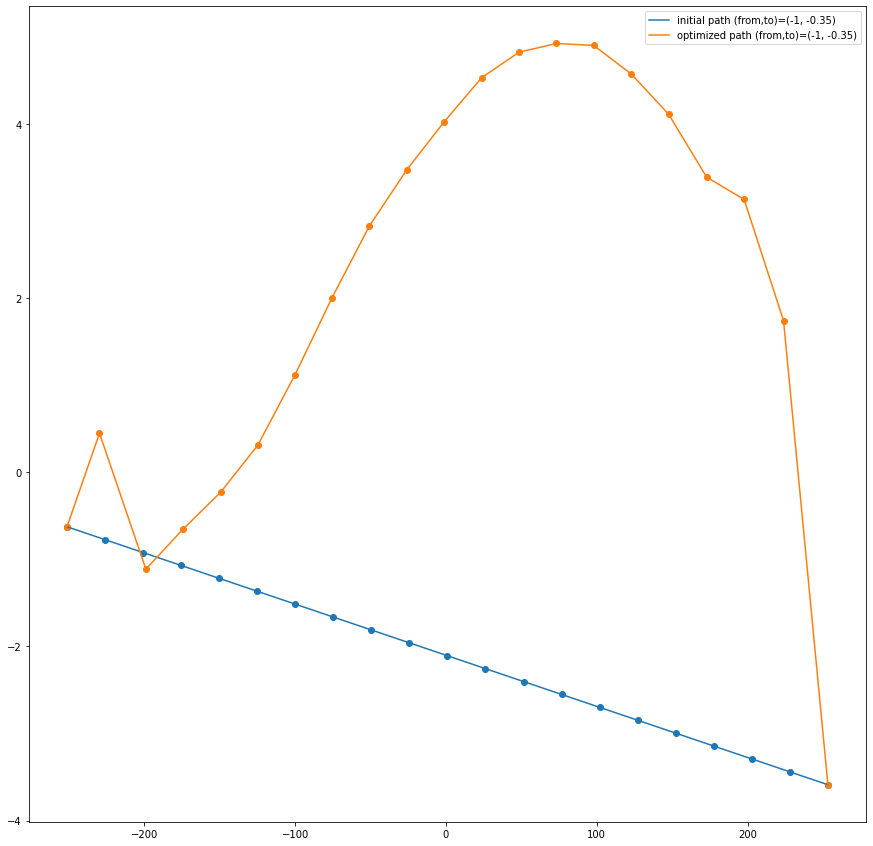

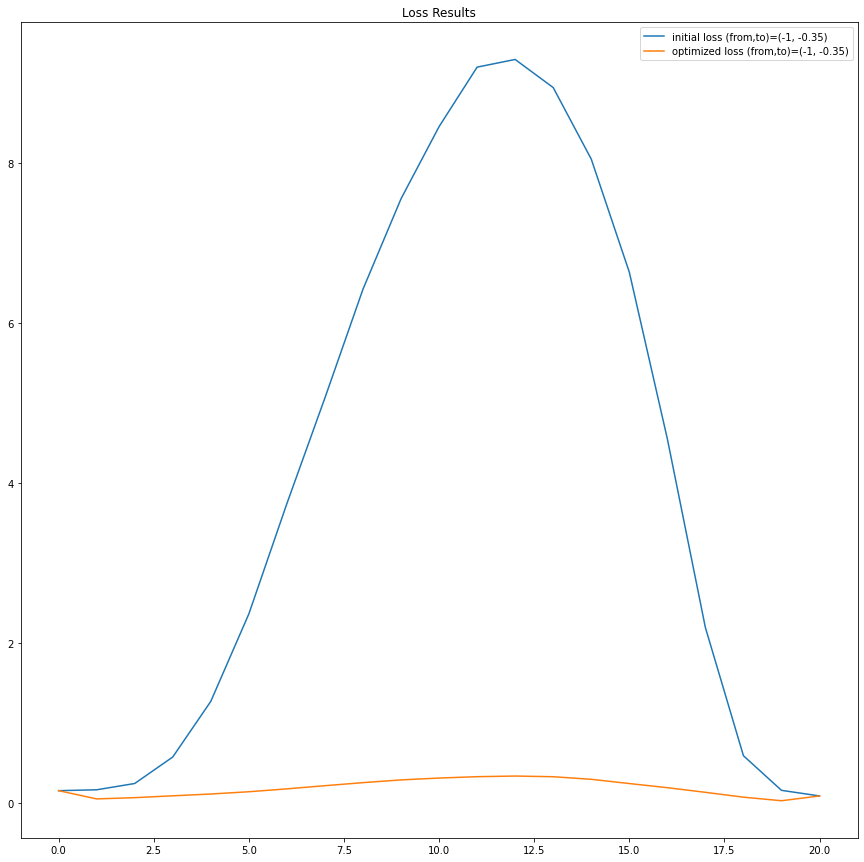

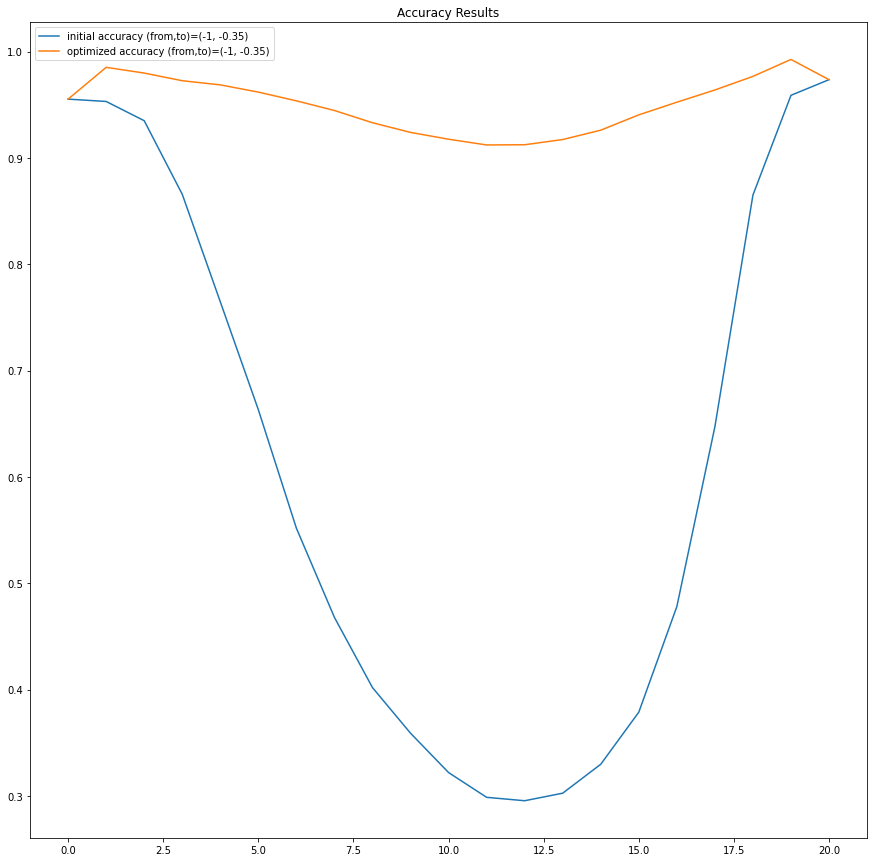

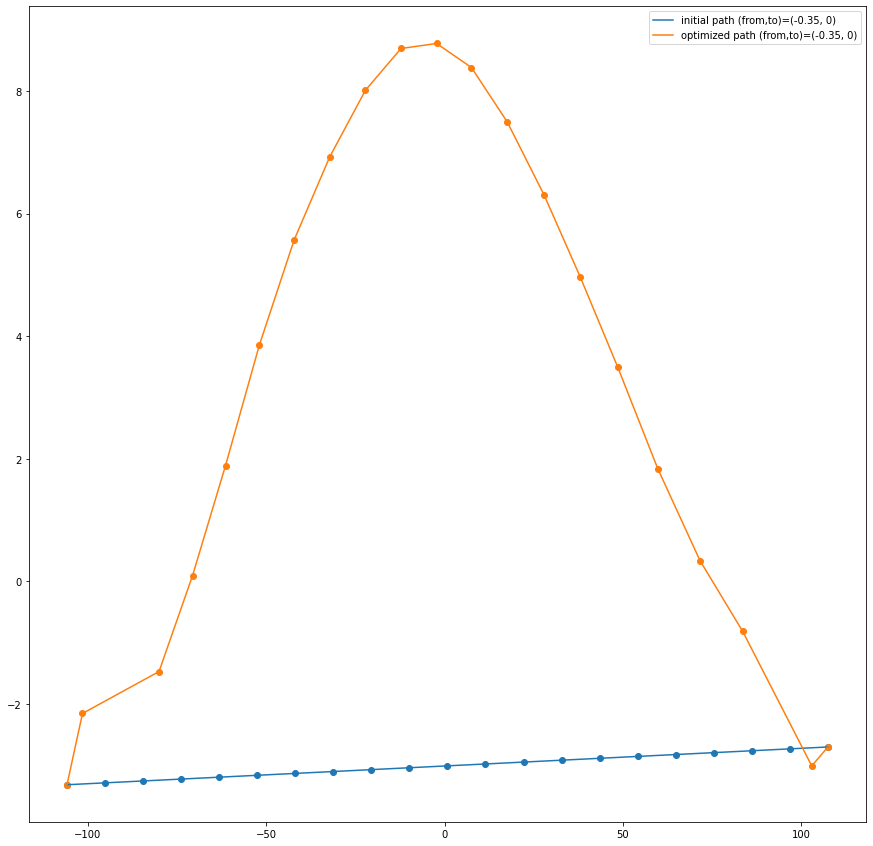

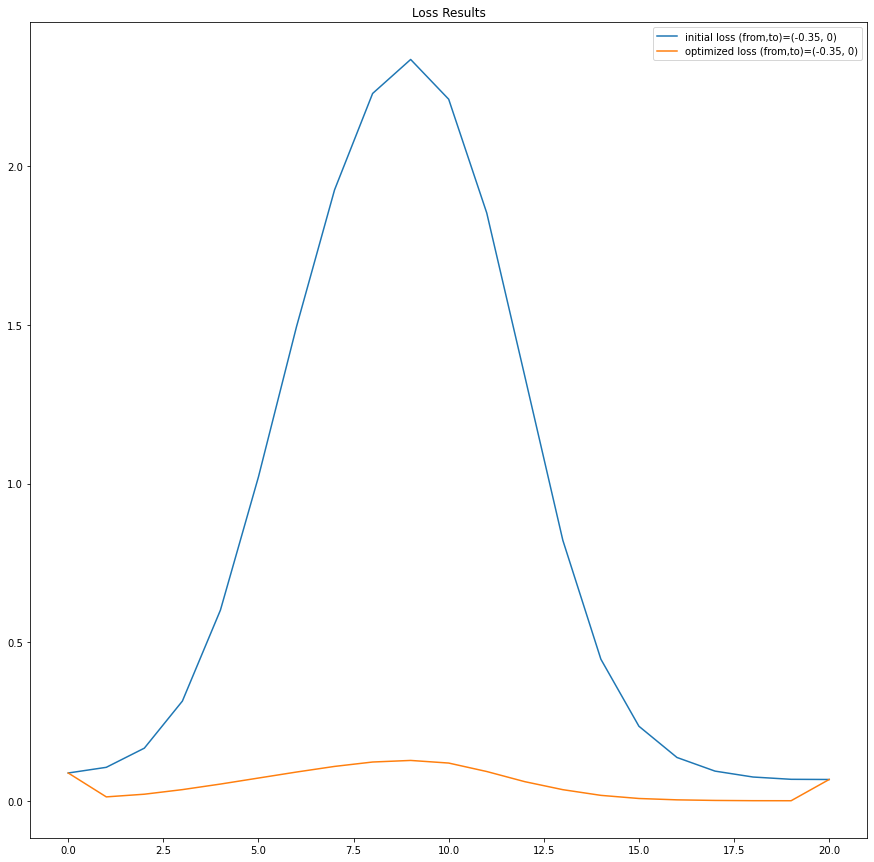

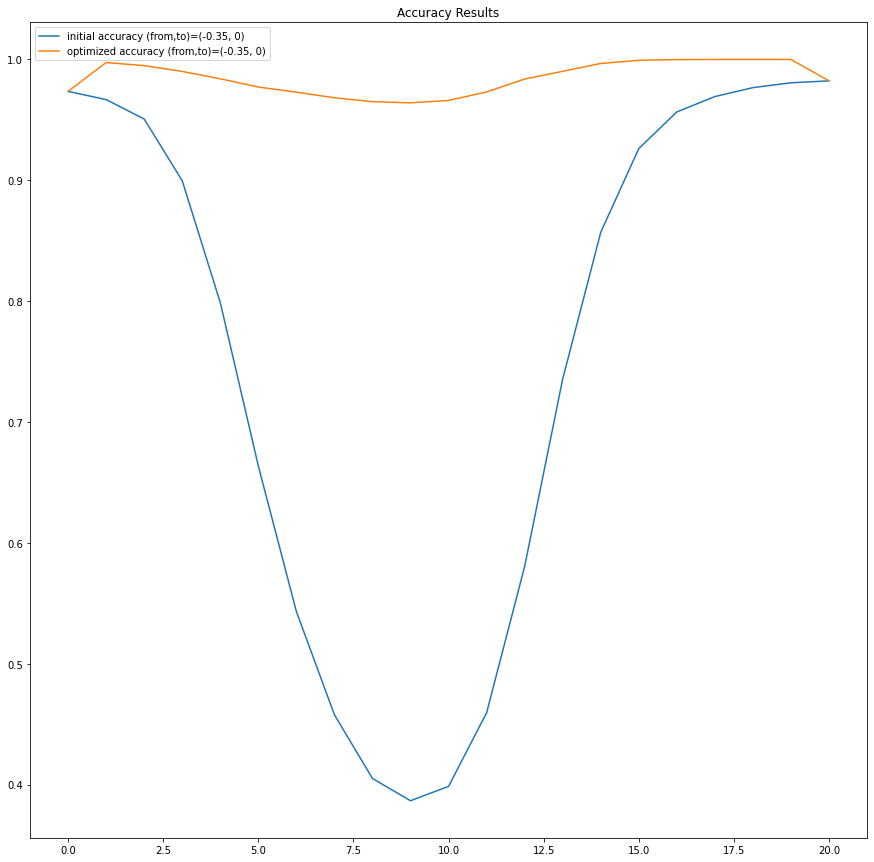

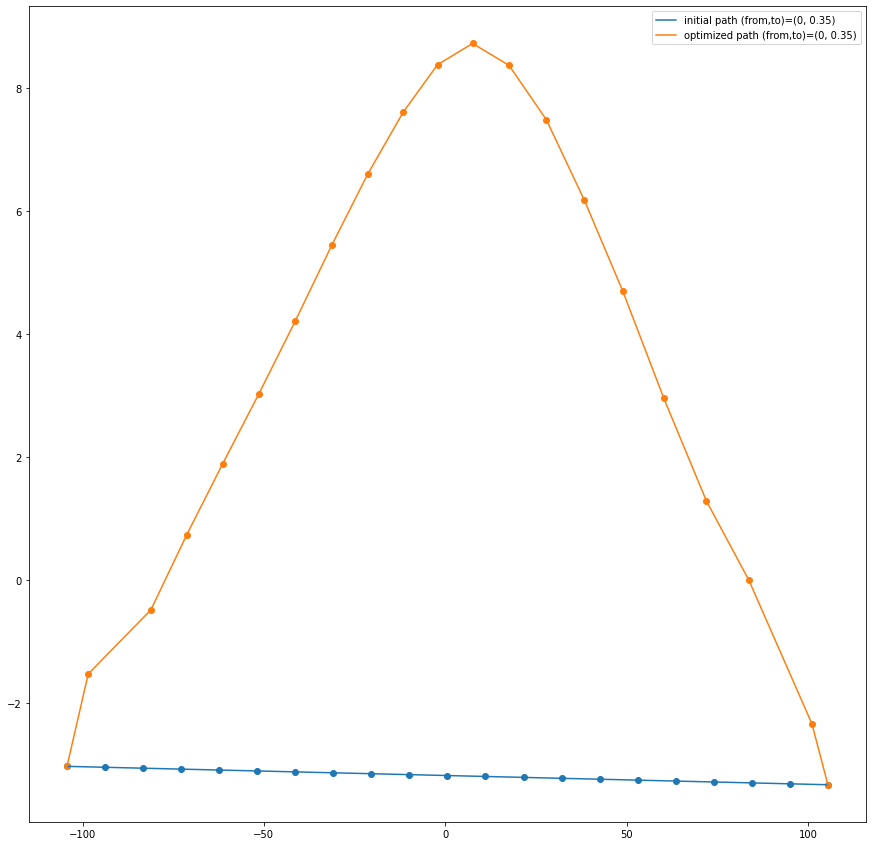

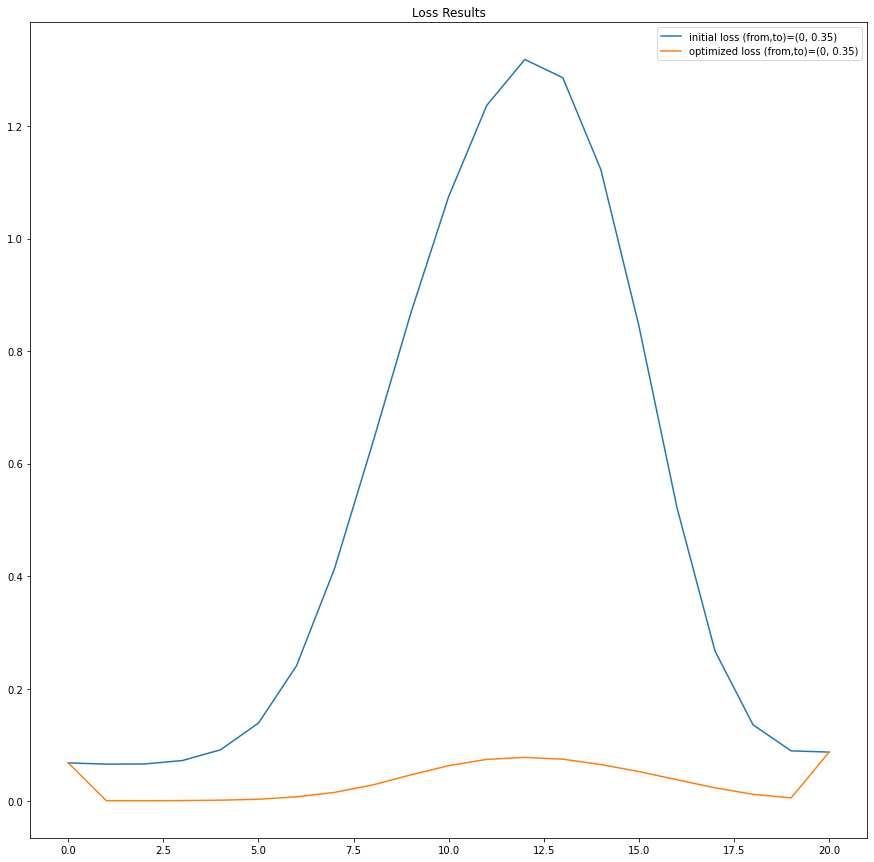

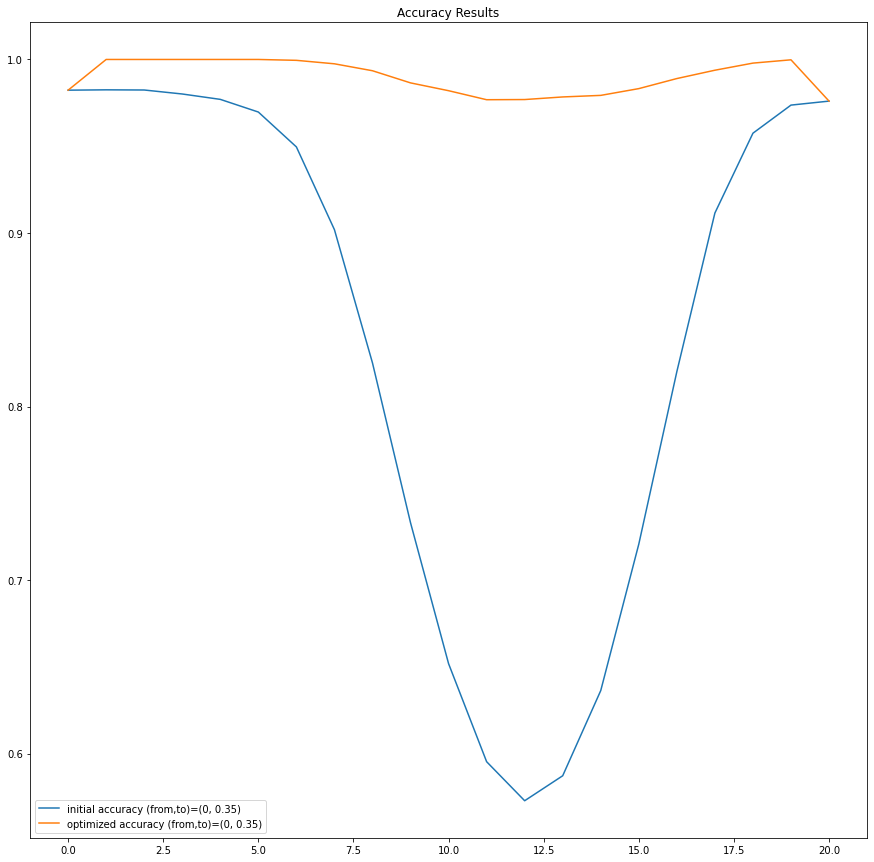

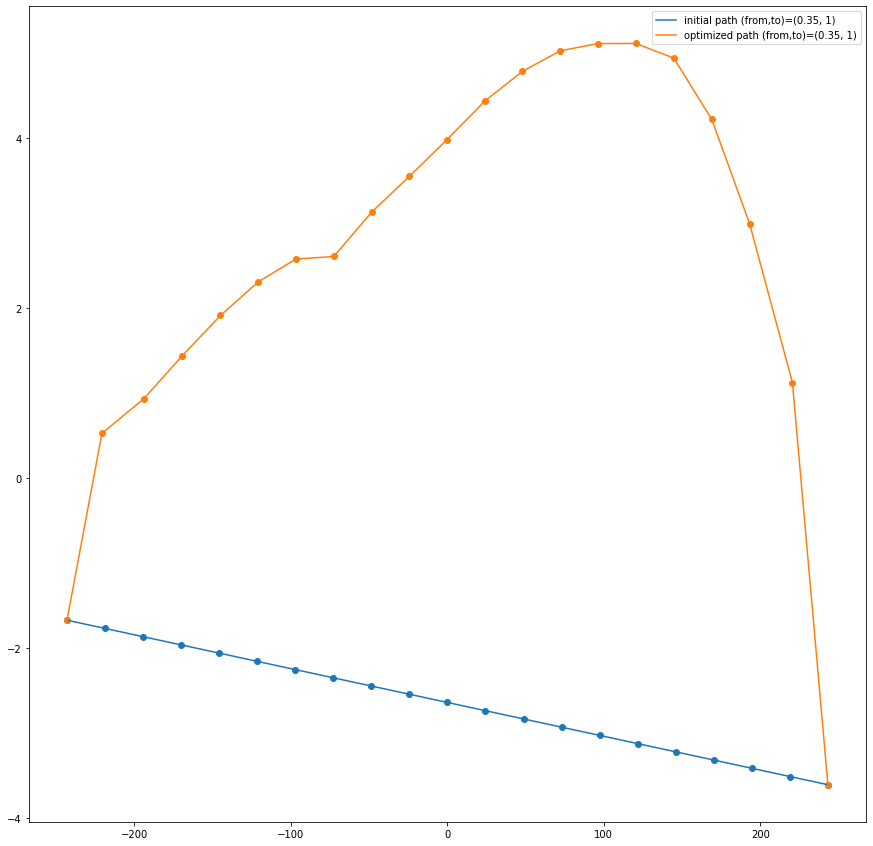

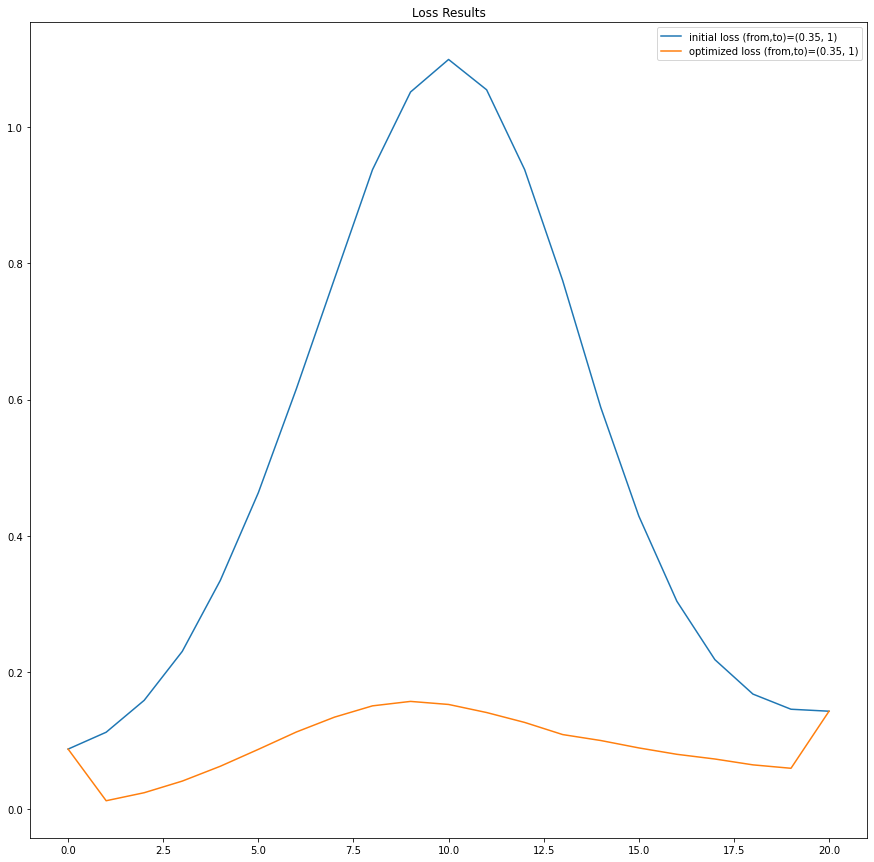

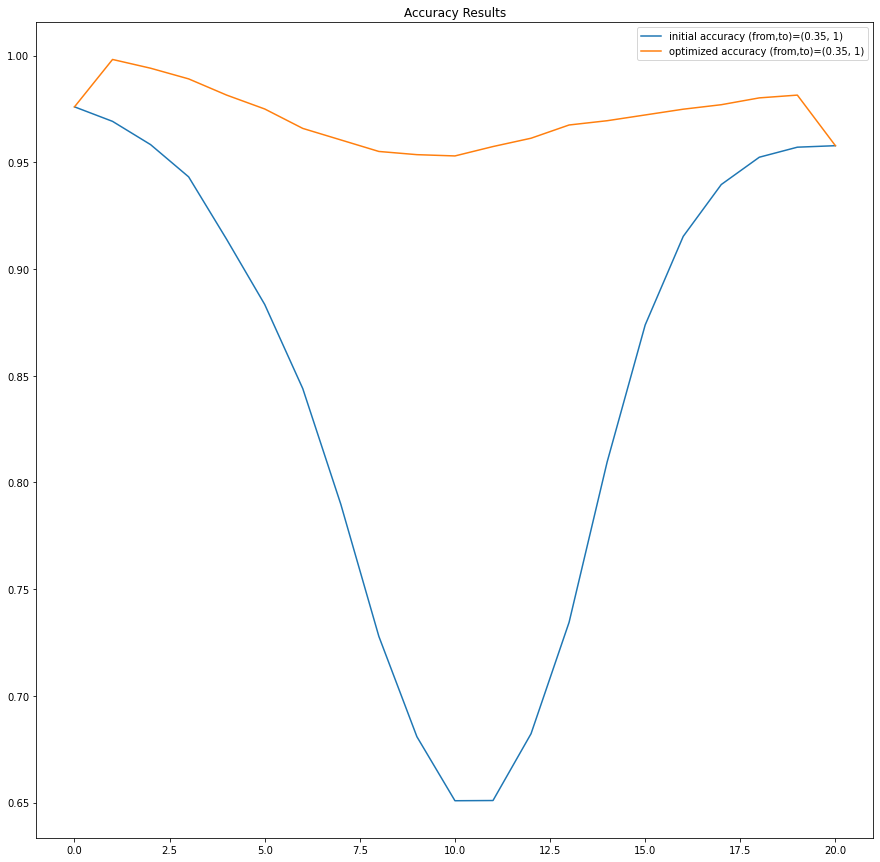

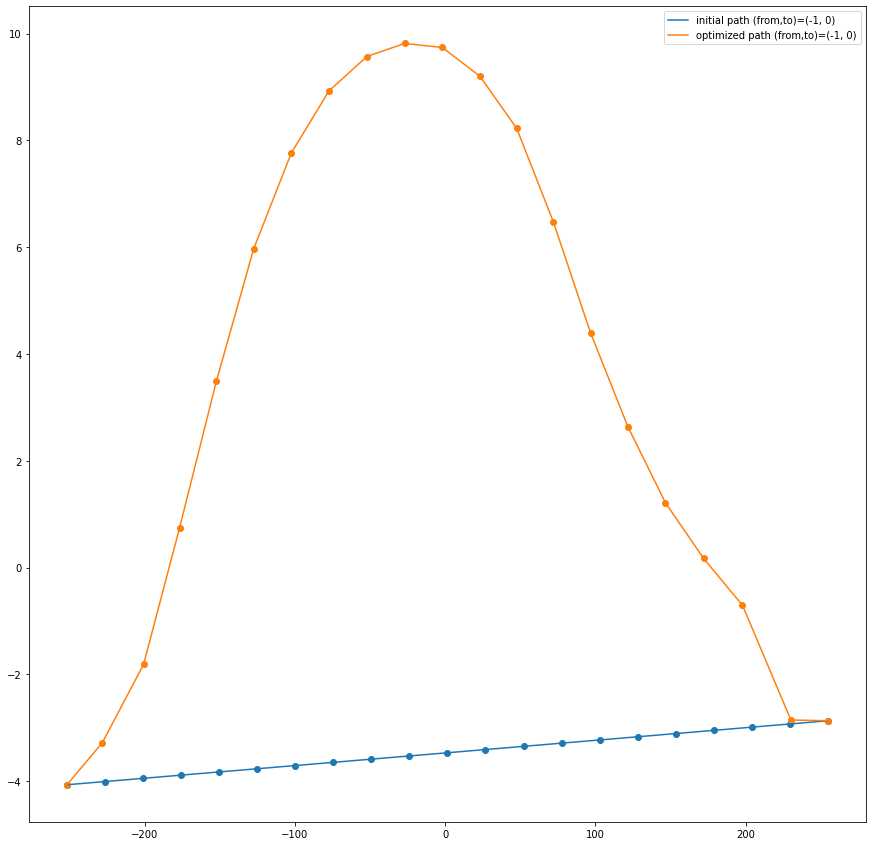

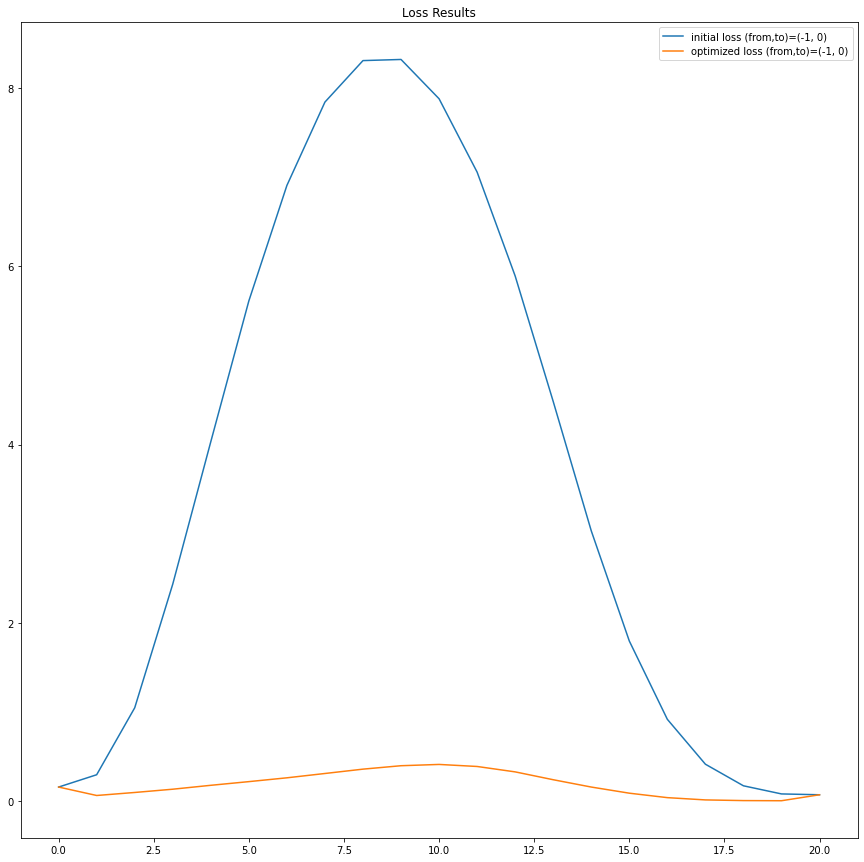

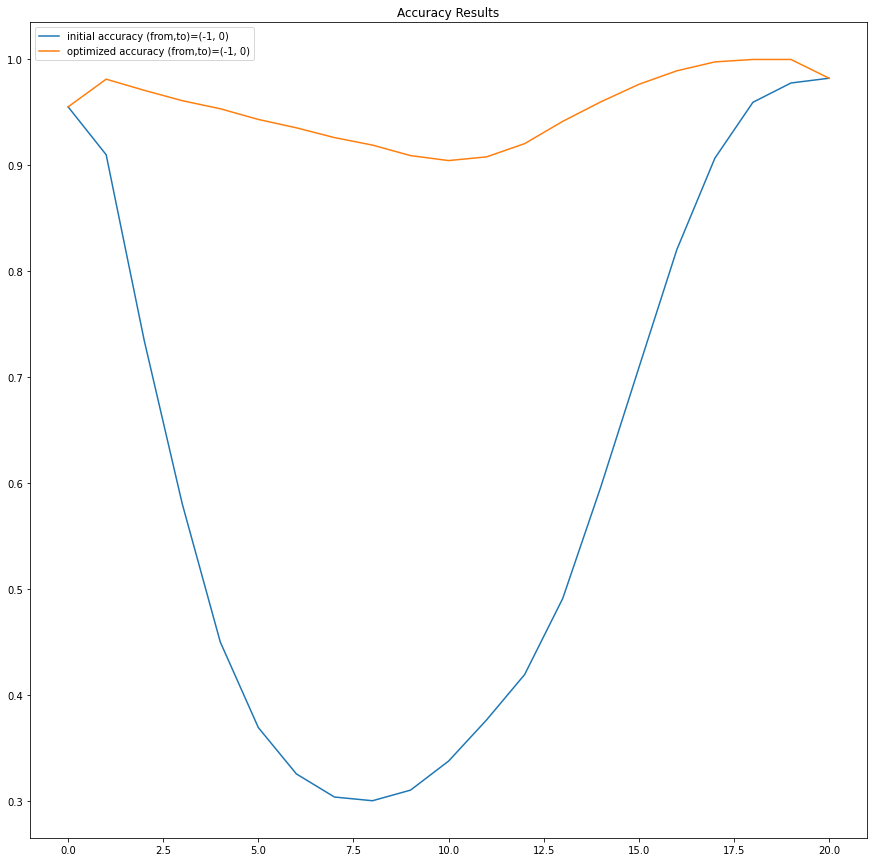

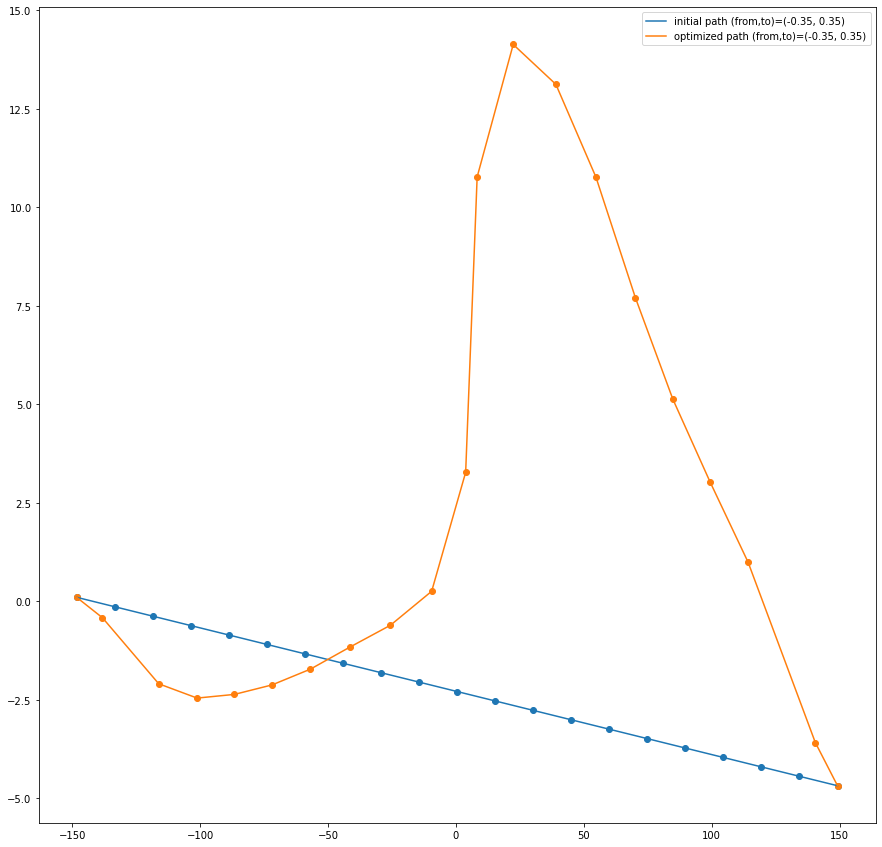

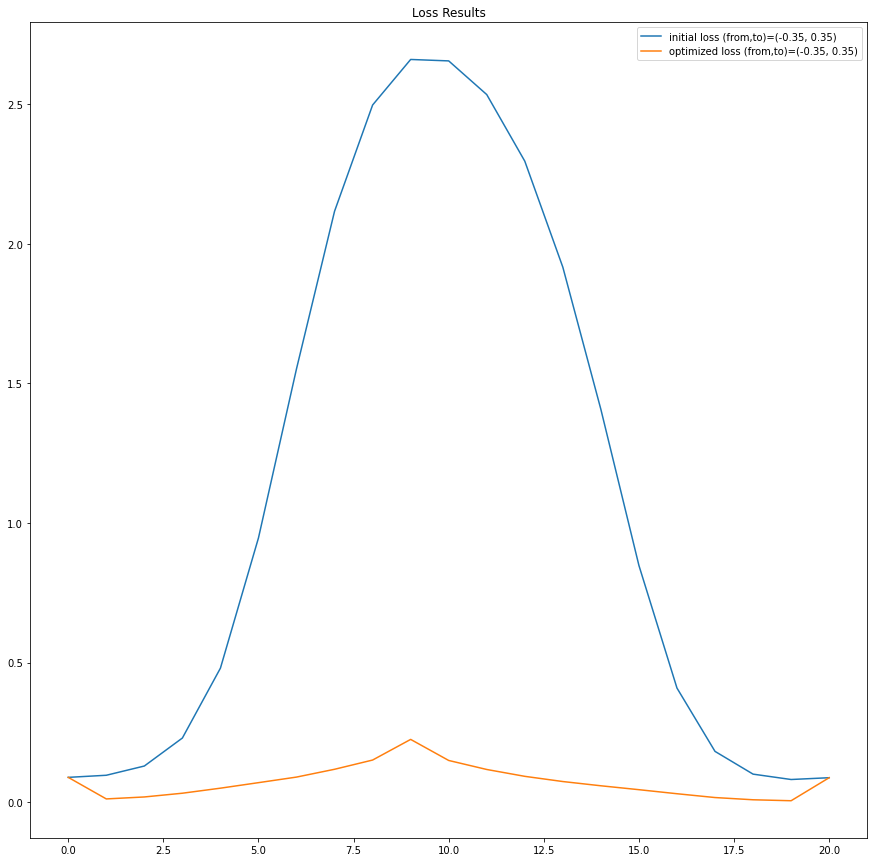

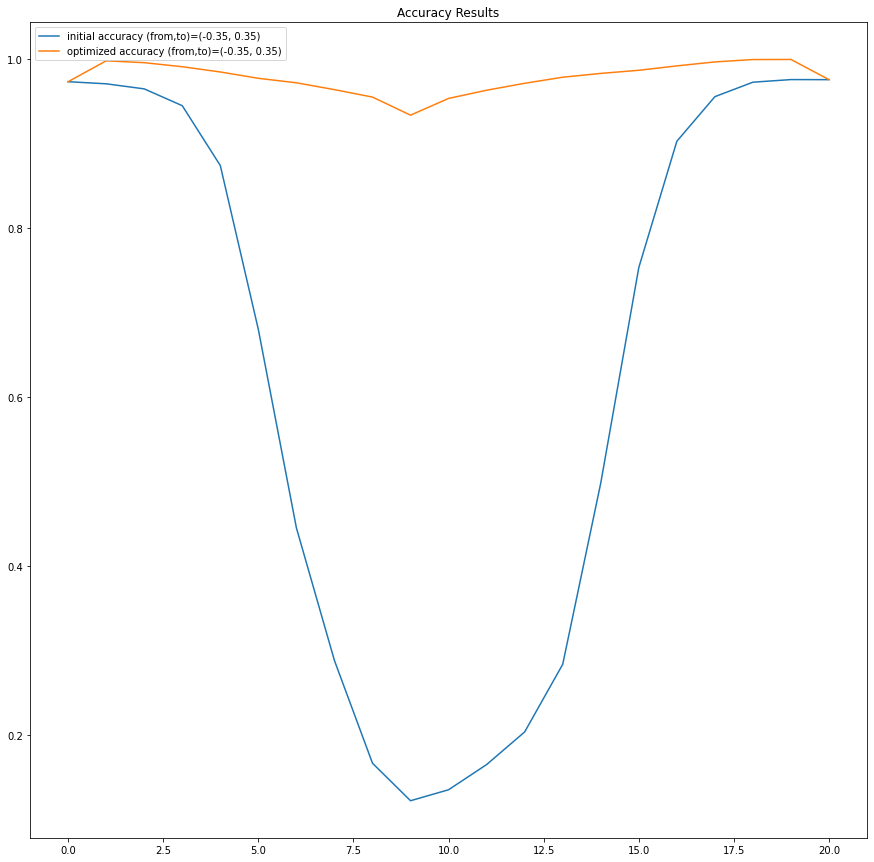

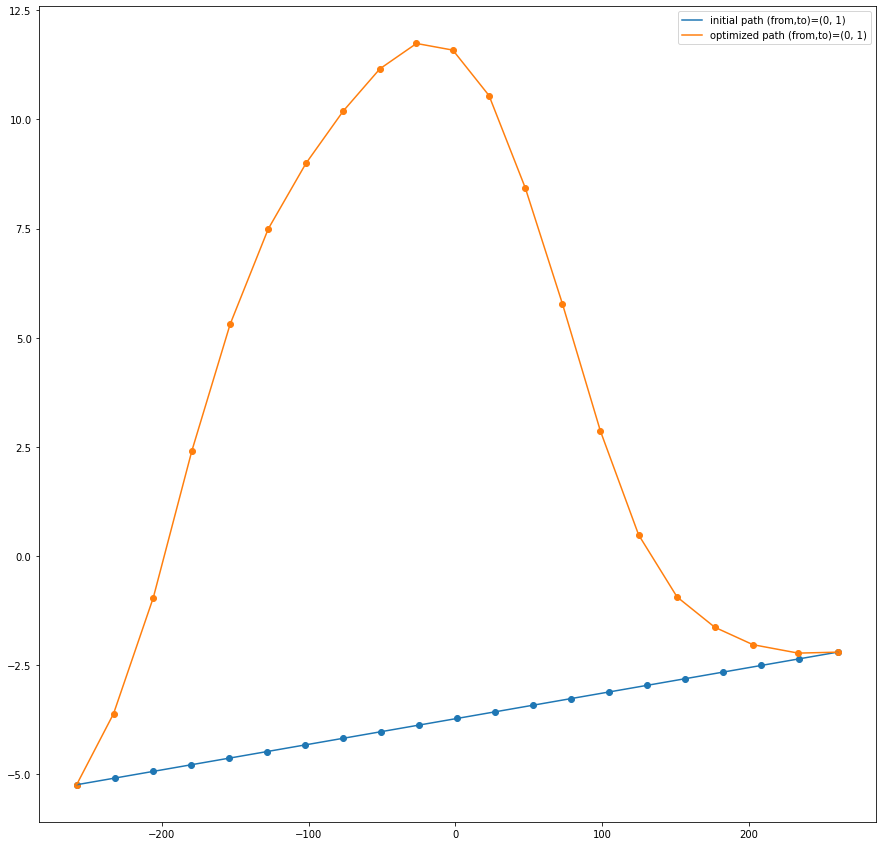

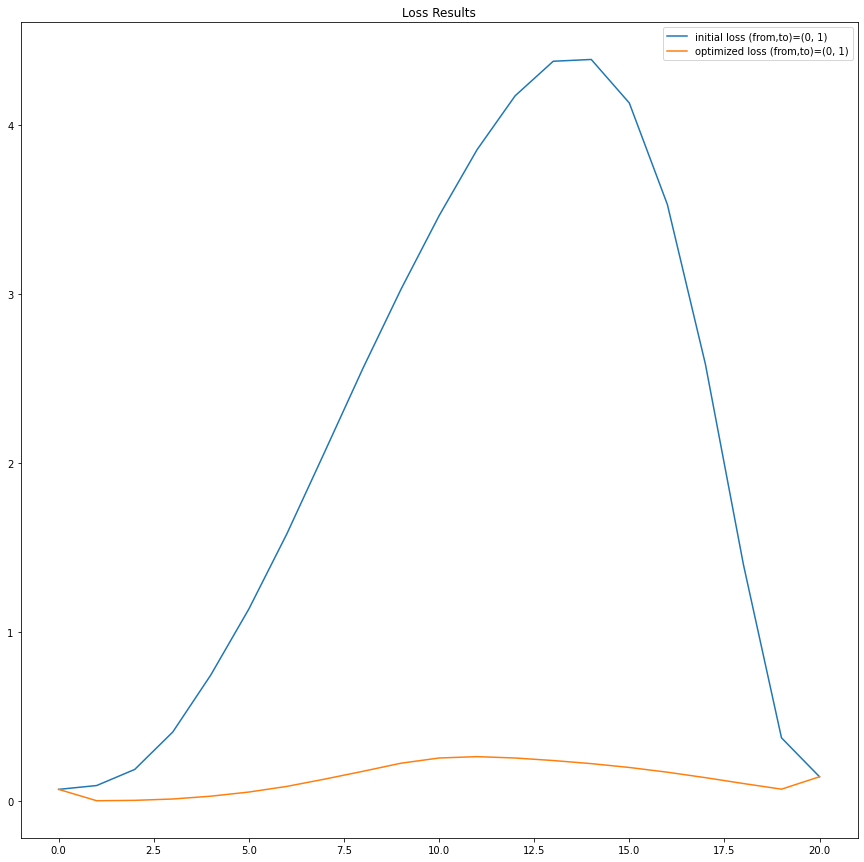

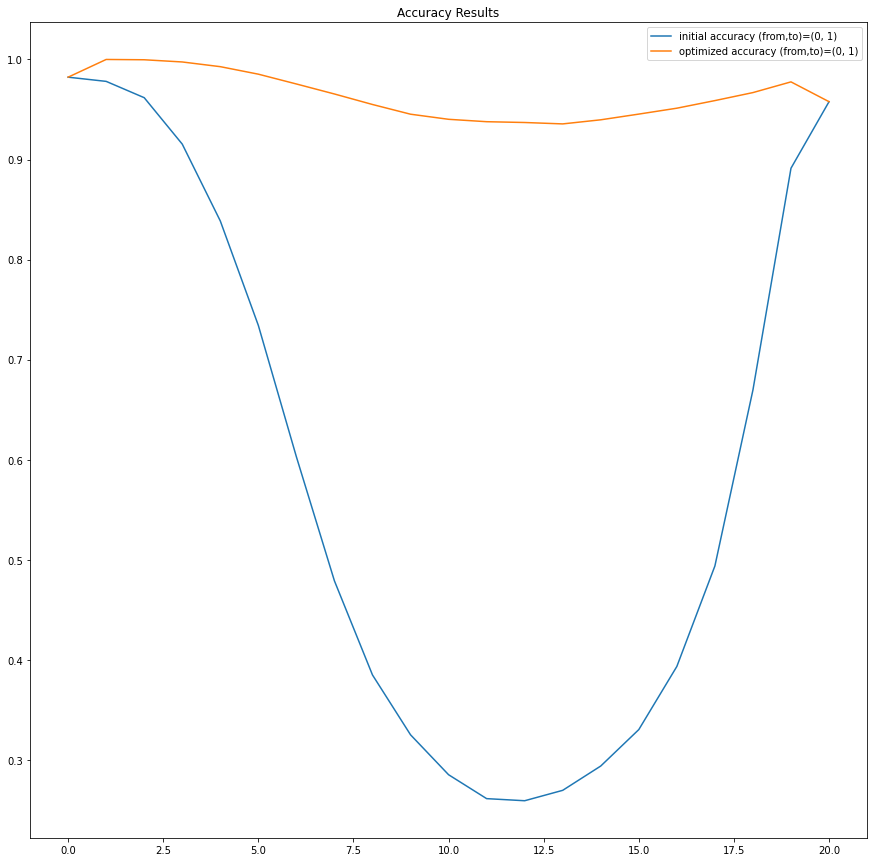

In [ ]:
runner.compareAllPaths()

In [ ]:
def flatPath(path):
  new_p=[]
  for i in range(len(path)):
    p=[]
    for j in range(len(path[i])):
      p=p+path[i][j].flatten().tolist()
    new_p.append(np.array(p))
  return np.array(new_p)

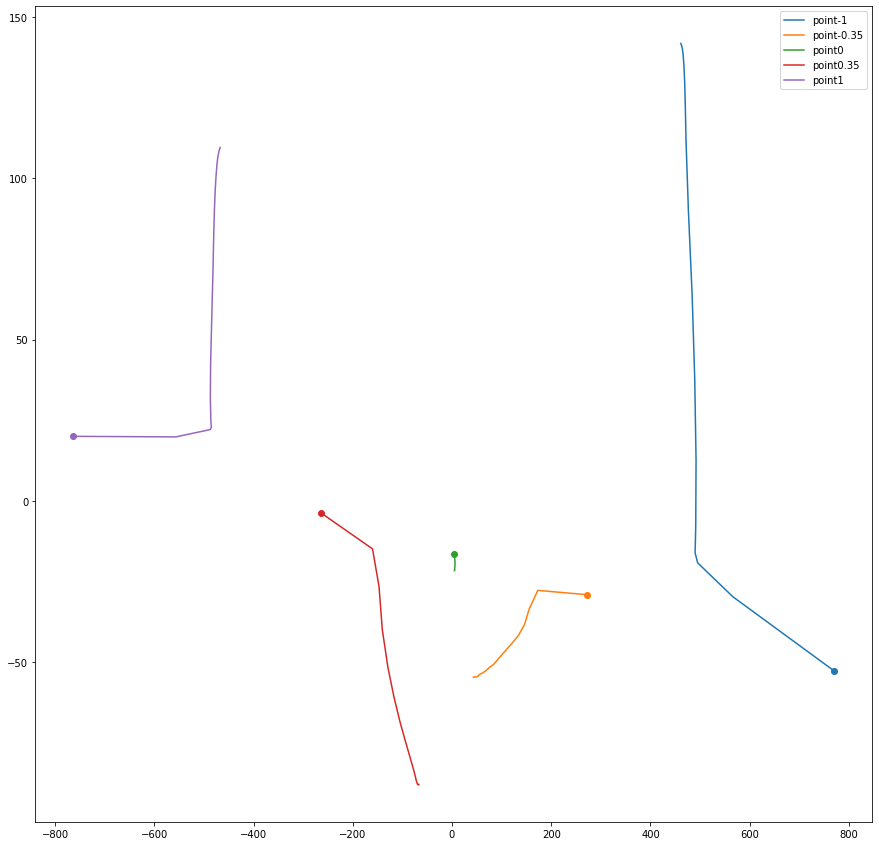

In [ ]:
#Her başlangıç noktasından başlanılan optimizasyon sürecinin çizdiği rota

rs=17
resultEpochs_arr=np.array(resultEpochs).reshape(rs*5,-1)
pca=PCA(n_components=2)
pca_weights=pca.fit_transform(resultEpochs_arr)
np.array(pca_weights).shape
plt.figure(figsize=(15, 15))
for i in range(len(resultEpochs_arr)//rs):
# Plotting both the curves simultaneously
  plt.plot(pca_weights[i*rs:(i+1)*rs,0], pca_weights[i*rs:(i+1)*rs,1], label='point'+str(startingPoints[i]))
  plt.scatter([pca_weights[i*rs,0]],[pca_weights[i*rs,1]])
# Naming the x-axis, y-axis and the whole graph
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
# To load the display window
plt.show()